# Christopher Jacob Ahumada Robles

# Caminata aleatoria
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/da/Random_Walk_example.svg" width="300px" height="100px" />

Una caminata aleatoria (*random walk* en inglés) es una formalización matemática de la trayectoria que resulta al hacer pasos sucesivos aleatorios. Un ejemplo elemental de caminata aleatoria es la caminata aleatoria en la línea de números enteros $\mathbb{Z}$, la cual comienza en $0$ y en cada paso se mueve $+1$ o $-1$ con igual probabilidad.

Otros ejemplos:
- Trayectoria de una molécula al viajar en un fluido (líquido o gas).
- El camino que sigue un animal en su búsqueda de comida.
- El precio fluctuante de una acción.
- La situación de un apostador en un juego de azar.

Todos pueden ser aproximados por caminatas aleatorias, aunque no sean en verdad procesos aleatorios.

**Este también es un ejemplo de caminata aleatoria**

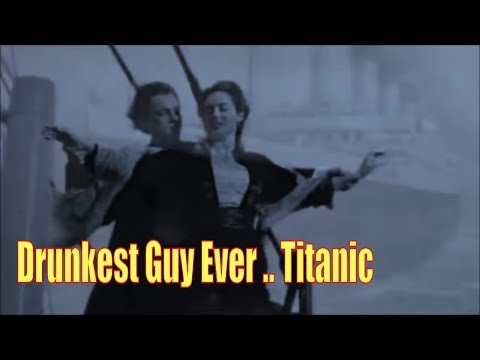

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Y77WnkLbT2Q')

### Caminata aleatoria en una dimensión
Como dijimos, un ejemplo elemental de caminata aleatoria es la caminata aleatoria en la línea de números enteros $\mathbb{Z}$, la cual comienza en $0$ y a cada paso se mueve $+1$ o $-1$ con igual probabilidad.

Esta caminata se puede ilustrar como sigue:
- Se posiciona en $0$ en la línea de números enteros y una moneda justa se tira.
- Si cae en **sol** nos moveremos una unidad a la derecha.
- Si cae en **águila** nos moveremos una unidad a la izquierda.

Notemos que después de $5$ pasos podremos estar en 1, −1, 3, −3, 5, or −5. Las posibilidades son las siguientes:

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/05/Flips.svg" width="900px" height="300px" />


Referencia:
- https://en.wikipedia.org/wiki/Random_walk

**Importante:** librería random.

Referencia:
- https://docs.python.org/3/library/random.html

In [233]:
import random
moneda=["aguila", "Sello"]
random.choice(moneda)

'Sello'

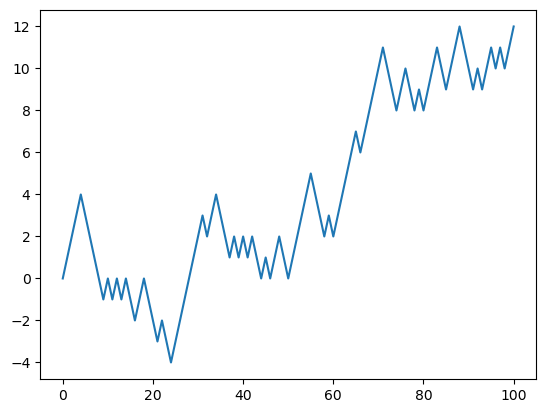

In [56]:
import random
moneda=["aguila", "Sello"]
   
def jueguito(pasos):
    posicion=[0]
    for i in range (pasos): 
        resultado=random.choice(moneda)
        if resultado=="Sello":
            posicion.append(posicion[-1]+1)
        else:
            posicion.append(posicion[-1]-1)
    return posicion

import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(jueguito(100))

**Actividad.** Graficar, en una misma ventana de gráficos, al menos ocho caminatas aleatorias de 100 pasos.

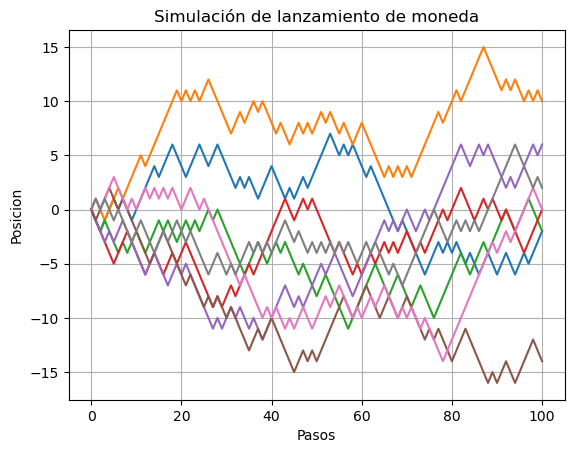

In [57]:
for i in range(8):
    plt.plot(jueguito(100))

plt.xlabel("Pasos")
plt.ylabel("Posicion")
plt.title("Simulación de lanzamiento de moneda")
plt.grid(True)
plt.show()

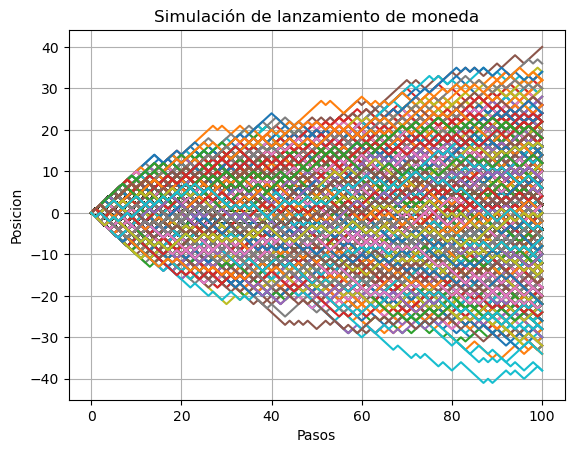

In [59]:
for i in range(8000):
    plt.plot(jueguito(100))

plt.xlabel("Pasos")
plt.ylabel("Posicion")
plt.title("Simulación de lanzamiento de moneda")
plt.grid(True)
plt.show()

### Usamos montecarlo para evaluar el resultado de la caminata aleatoria

- Describir, de nuevo, el proceso de la caminata aleatoria en el pizarrón y ver el valor esperado de la caminata después de N pasos.

- Luego, evaluar el proceso utilizando montecarlo y comparar resultados.

In [3]:
import numpy as np
def randomwalk(x=0,n=800):
    for i in range(n):
        step=np.random.choice([1,-1])
        x=x+step
    return x
randomwalk()

30

In [6]:
last,N=[],100
for i in range(N):
    last.append(randomwalk())
np.mean(last)

-1.58

En promedio la posicion final de la caminata aleatoria fue la de arriba

## Ejemplo

Ahora, para comprender el alcance de la simulación Montecarlo, tomaremos el ejemplo de un apostador básico.

Referencia:
- https://pythonprogramming.net/monte-carlo-simulator-python/

Supongamos que estamos en un casino especial, donde el usuario puede tirar un *dado metafórico* que puede dar como resultado del número uno (1) al número cien (100).

Si el usuario tira cualquier número entre 1 y 50, el casino gana. Si el usuario tira cualquier número entre 51 y 99, el usuario gana. Si el usuario tira 100, pierde.

Con esto, el casino mantiene un margen del 1%, el cual es mucho más pequeño que el margen típico en casinos, al igual que el margen de mercado cuando se incorporan costos por transacción.

Por ejemplo, [Scottrade](https://www.scottrade.com/) cobra $\$7$ USD por transacción. Si se invierten $\$1000$ USD por acción, esto significa que tienes que pagar $\$7$ USD para entrar, y $\$7$ USD para salir, para un total de $\$14$ USD.

Esto pone el margen en 1.4\%. Esto significa, que a largo plazo, las ganancias tienen que ser mayores a 1.4\% en promedio, de otra manera se estará perdiendo dinero. Aunque este porcentaje es pequeño, las probabilidades ya están en contra. La comercialización de acciones es un juego 50/50, especialmente en el corto plazo.

De nuevo, con nuestro ejemplo en mente, 1-50, la casa gana. 51-99 el usuario gana. Un 100 significa que la casa gana.

Ahora, comencemos. Primero tenemos que crear nuestro dado.

**Explorar función randint de la librería random**

In [177]:
def apostador():
    dado=np.random.randint(1,100)
    if dado < 51 or dado == 100:
        return "Casino gana",dado
    else:
        return "Usted gana",dado
    

In [179]:
apostador()

('Casino gana', 47)

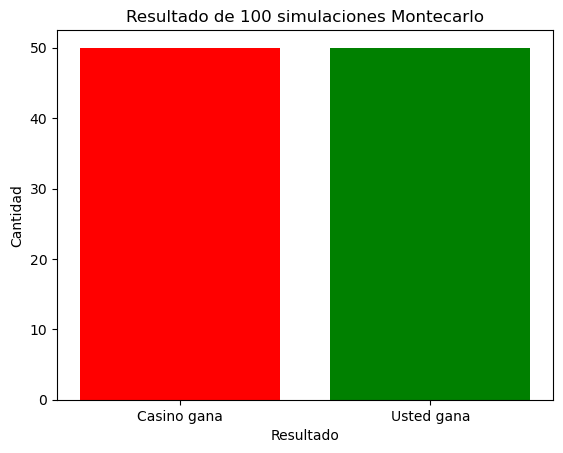

In [199]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
resultados = []
for i in range(100):
    resultado, dado = apostador()
    resultados.append((resultado, dado))

df = pd.DataFrame(resultados, columns=['Resultado', 'Dado'])

victorias = df['Resultado'].value_counts()

plt.bar(victorias.index, victorias.values, color=['red', 'green'])
plt.title('Resultado de 100 simulaciones Montecarlo')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.show()

Sin embargo, el dado por si solo no nos es útil. Necesitamos una función que nos devuelva sólamente si ganamos o perdemos.

Ahora, necesitamos crear un apostador. Empezaremos con uno extremadamente básico por ahora. Veremos, que aún con un apostador muy básico, aparecerán cosas muy reveladoras usando un simulador montecarlo.

**Apostador simple.** Las caracterísitcas son:
* Se empieza con un capital inicial, 
* Siempre se apuesta lo mismo,
* Y se va a apostar un número determinado de veces.
* Si se gana, se añade la apuesta al capital,
* Si se pierde, se descuenta la apuesta del capital.
* La función debe devolver un arreglo con el capital al final de cada apuesta.

In [202]:
# K=CAPITAL, M=MONTO POR APUESTA, N=NUMERO DE APUESTAS
def apostador_2():
    dado=np.random.randint(1,100)
    if dado < 51 or dado == 100:
        return False
    else:
        return True
    
def ludopata_1(K,M,N):
    K=[K]
    for i in range(N):
        if apostador_2() == True:
            K.append(K[-1]+M)
        else:
            K.append(K[-1]-M)
    return K

In [203]:
ludopata_1(10000,10,10)

[10000, 10010, 10000, 9990, 10000, 10010, 10000, 9990, 9980, 9970, 9980]

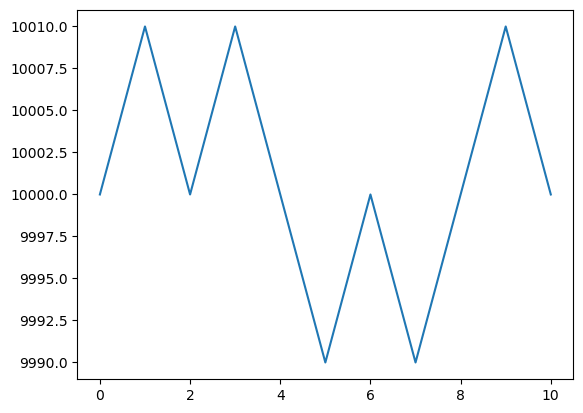

In [207]:
plt.plot(ludopata_1(10000,10,10))

En realidad no nos importa tanto como evolucionan estos fondos. Nos importa más cuáles son los fondos al final (al largo plazo). Modificar la función anterior para ver esto.

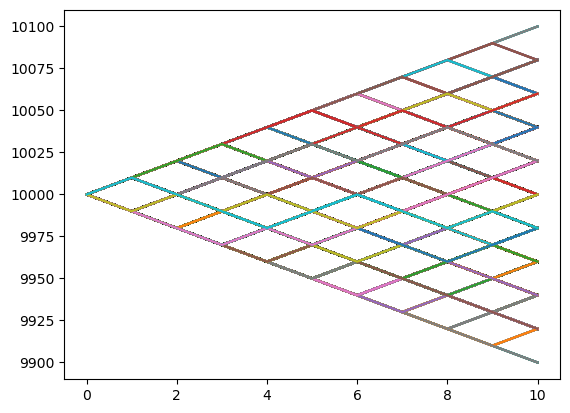

In [212]:
for i in range(10000):
    plt.plot(ludopata_1(10000,10,10))

In [228]:
resultados_finales = []
for i in range(100):
    resultado = ludopata_1(10000, 10, 10)
    cambio_porcentual = (resultado[-1] - resultado[0]) / resultado[0] * 100
    resultados_finales.append(cambio_porcentual)
pd.DataFrame(resultados_finales).mean()

0   -0.004
dtype: float64

In [ ]:
Segun lo anterior los usuarios simulados en promedio perdieron el 0.004% de su capital

Vemos que al largo plazo la mayoría de los apostadores quebraron. Sin embargo, esta forma de visualizar los resultados no es adecuada. Utilicemos matplotlib.

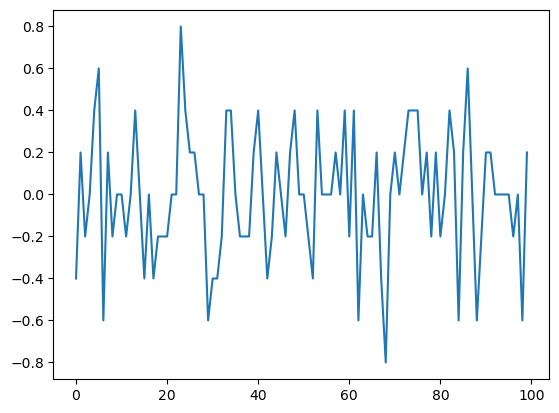

In [229]:
plt.plot(resultados_finales)

Por esto los apostadores pierden. Normalmente las probabilidades no están evidentemente muy en contra de ellos, solo un poco. Los casinos únicamente entienden psicología básica: ganar es extremadamente adictivo. Por ello, los casino se construyen para mantenerte jugando.

En el corto plazo, la mayoría de los jugadores no se dan cuenta que son más propensos a perder. Las veces que ganan y pierden son muy parejas. Estadísticamente, casi la mitad de las personas terminarán con ganancias después de jugar unas pocas veces. El problema es la adicción, y que ellos continuarán apostando, y por ende perdiendo sus ganancias. Es matemática extremadamente básica, pero la psicología humana es débil.